### Hands on Training an Artificial Neural Network ANN for a simple classification task for practice.

### Step 1 : Install & Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , LeakyReLU
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Step 2 : Load Data

In [2]:
# Load the MNIST dataset
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [25]:
X_train.shape

(60000, 28, 28)

### Preprocess Data

In [3]:
# Normalize pixel values 
X_train , X_test = X_train / 255.0 , X_test / 255.0

In [26]:
X_train.shape

(60000, 28, 28)

### Display some sample images

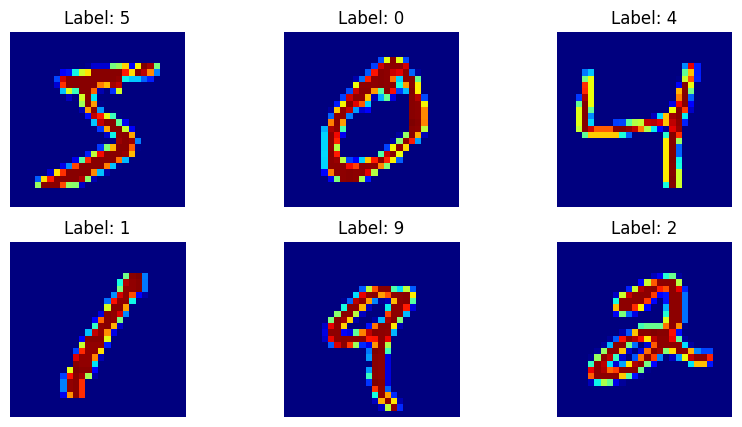

In [4]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1) # (rows,cols,index)
    plt.imshow(X_train[i],cmap='jet')
    plt.title(f"Label: {Y_train[i]}")
    plt.axis('off')
plt.show()    

### Step 3 : Build an ANN model
#### Now we will create a Fully Connected feedforward Neural Network(FCNN) using Keras.

In [ ]:
# Define the ANN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)), # Input Layer (flatten 28x28 to a 1D array)
    keras.layers.Dense(128,activation='relu'), # Hidden Layer with 128 Neurons
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation='softmax') # Output Layer (10 classes: 0-9)
])


In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Show model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Explanation:

Flatten Layer: Converts 28×28 images into a 1D vector.

Hidden Layers: Two dense layers with ReLU activation.

Output Layer: 10 neurons (one for each digit), using softmax activation.

Loss Function: sparse_categorical_crossentropy (since labels are integers).

Optimizer: adam (Adaptive Moment Estimation).

### Visual Diagram

In [ ]:
!apt-get install graphviz -y
!pip install pydot pydotplus graphviz

In [32]:
import graphviz
import pydot
from tensorflow.keras.utils import plot_model

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,to_file="model.png",show_shapes=True,show_layer_names=True)

### Step 4 : Train the Model

In [20]:
# Train the ANN model

history = model.fit(X_train,
                    Y_train,
                    epochs = 5,
                    batch_size = 32,
                    validation_data = (X_test,Y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8526 - loss: 0.5069 - val_accuracy: 0.9599 - val_loss: 0.1380
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9478 - loss: 0.1717 - val_accuracy: 0.9686 - val_loss: 0.0995
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9612 - loss: 0.1294 - val_accuracy: 0.9727 - val_loss: 0.0910
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9670 - loss: 0.1086 - val_accuracy: 0.9743 - val_loss: 0.0848
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9713 - loss: 0.0921 - val_accuracy: 0.9770 - val_loss: 0.0713


What happens during training?

The model forwards propagates inputs to predict labels.

It compares predictions to actual labels using cross-entropy loss.

Backpropagation adjusts weights using gradient descent (Adam optimizer).

### Step 5 : Evaluate Performance

In [21]:
# Evaluate the model on test data
test_loss , test_acc = model.evaluate(X_test,Y_test,verbose=1)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0854

Test Accuracy: 97.70%


 If accuracy is low, try:

Increasing epochs

Adding more layers

Using CNNs (Convolutional Neural Networks) instead of FCNNs

### Step 6 : Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


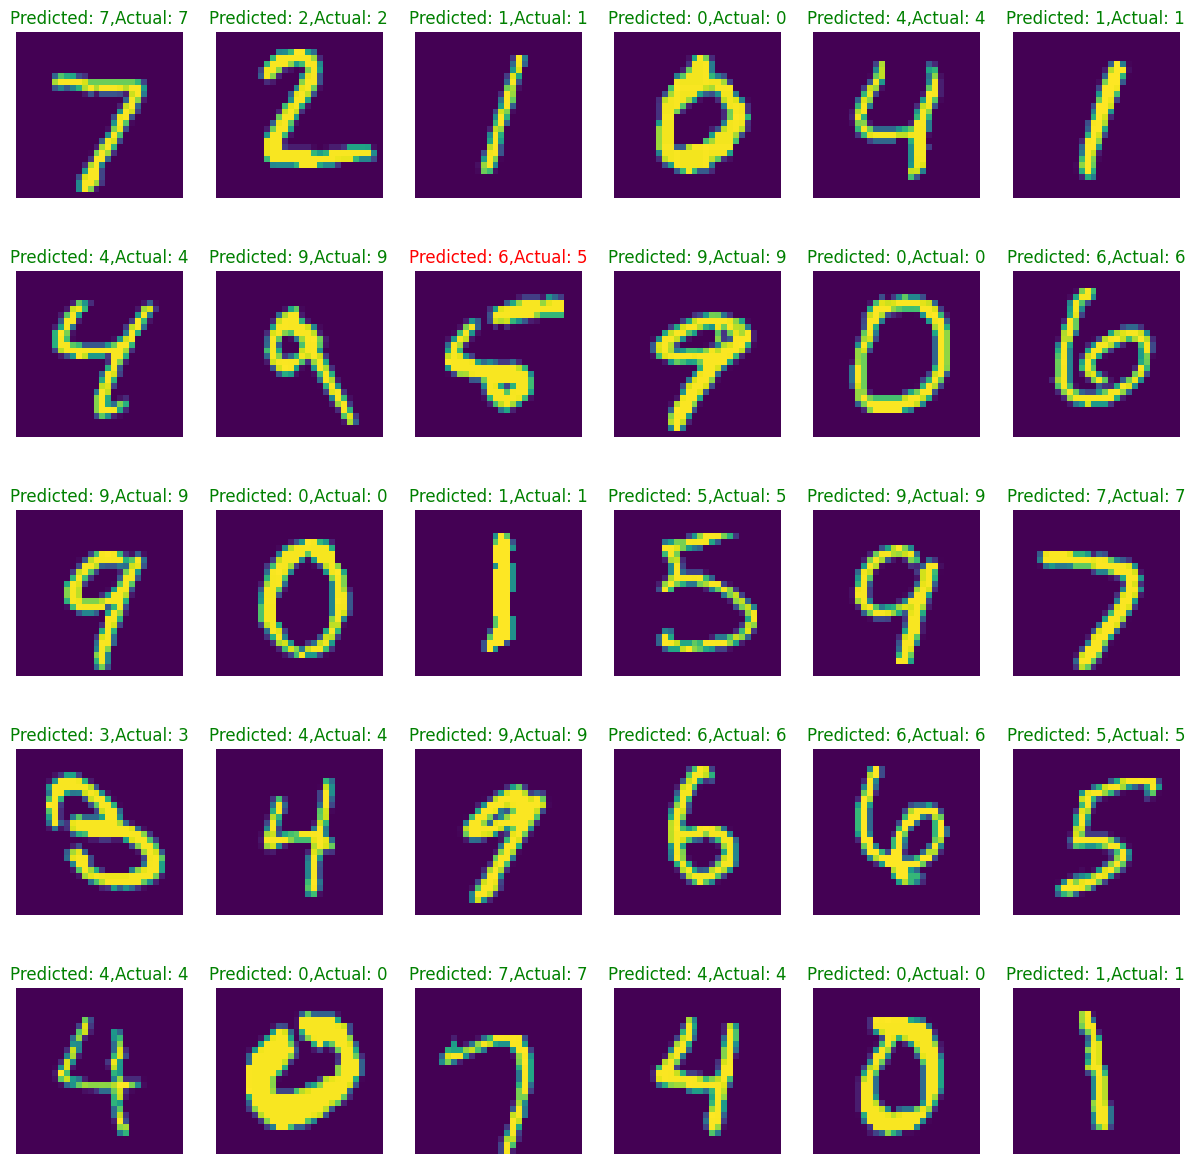

In [22]:
# Make Predictions
predictions = model.predict(X_test)

# Plot some test images with predictions 
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(X_test[i],cmap='viridis')
    plt.axis('off') 
    plt.grid(True)
    predicted_label = np.argmax(predictions[i])
    actual_label = Y_test[i]
    if predicted_label == actual_label:
        color = 'green'
    else:
        color = 'red'
    # use this line    
    #color = 'red' if predicted_label != actual_label else 'green'    
    plt.title(f"Predicted: {predicted_label},Actual: {actual_label}",color = color)         
plt.show()    

What this does:

Uses the trained model to predict labels for unseen test images.
Displays predictions alongside actual images.

🎯 Final Summary

✅ You built an ANN model for digit classification!

✅ Used backpropagation & Adam optimizer for training.

✅ Achieved high accuracy (~98%) on MNIST.

Would you like to:

1️⃣ Tune hyperparameters (learning rate, layers, batch size)?

2️⃣ Use CNNs for better image classification?

3️⃣ Train on a different dataset (e.g., CIFAR-10 for object recognition)?

Let me know how you want to proceed! 🚀🔥